# Plotting averages and other aggregations on existing data

In [1]:
import pandas as pd
from plotnine import *

df = pd.read_csv("countries.csv")
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


## Plotting averages on scatter/dot plots with `stat_summary`

The easiest way to plot an average on top of an existing chart is to use `stat_summary`. In the example below, we use it with several parameters:

* `geom=point` to use a dot as the visual representation of the statistical summary
* `fun_y=np.median` to use numpy's `median` method to calculate where to place the dots. It will use the median to place the dot on the y axis (`fun_y` is "function for the y axis").
* `color='magenta'` to make it magenta, unlike the other dots

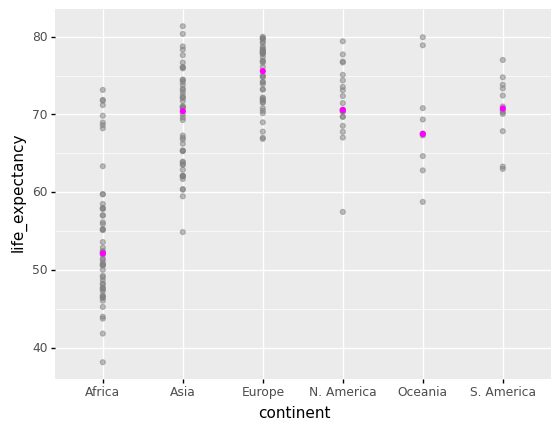

<ggplot: (312057085)>

In [17]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + geom_point(color='grey', alpha=0.5)
    + stat_summary(geom='point', fun_y=np.median, color='magenta')
)

Note that you cannot do `fun_y='median'`, even though it seems like you should be able to.

## Plotting maximum/minimums on scatter/dot plots with `stat_summary`

In the same way you use `np.median` to plot the median above, you can also use `np.max` and `np.min`.

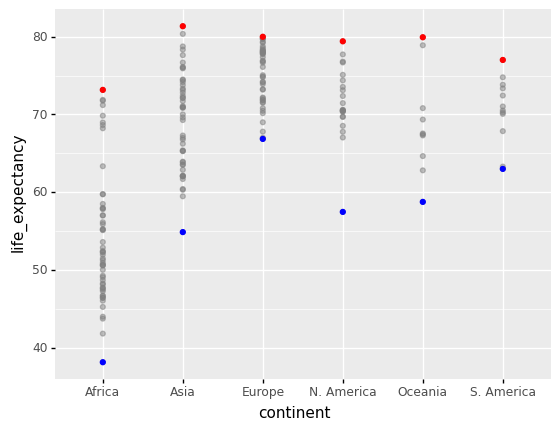

<ggplot: (310030653)>

In [24]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + geom_point(color='grey', alpha=0.5)
    + stat_summary(geom='point', fun_y=np.max, color='red')
    + stat_summary(geom='point', fun_y=np.min, color='blue')
)

## Anything is possible

Play around with it, it can get fun

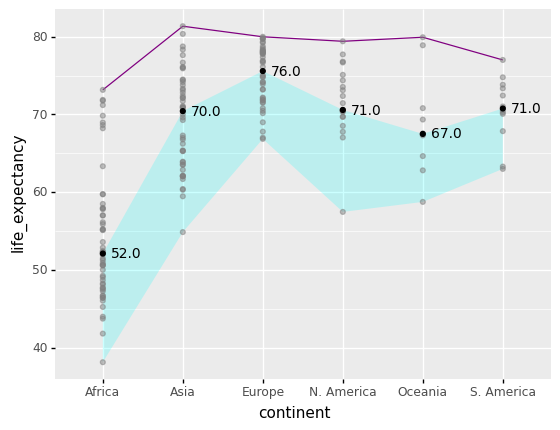

<ggplot: (312934560)>

In [77]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + stat_summary(geom='line',
                   fun_y=np.max,
                   color='purple',
                   group='continent')
    + stat_summary(geom='ribbon',
                   fun_ymin=np.min,
                   fun_ymax=np.median,
                   color='none',
                   fill='cyan',
                   group='continent',
                   alpha=0.2)
    + geom_point(color='grey', alpha=0.5)
    + stat_summary(geom='point',
                   fun_y=np.median,
                   color='black')
    + stat_summary(aes(label=after_stat('round(y)')),
                   geom='text',
                   fun_y=np.median,
                   color='black',
                   size=10,
                   ha='left',
                   nudge_x=0.1)
)